In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


/tmp/ipykernel_33904/1009748126.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


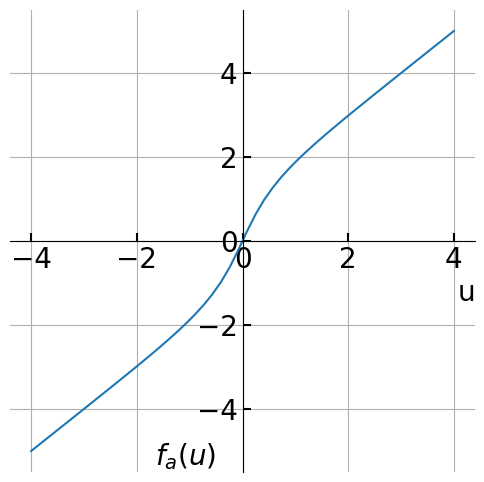

In [8]:

plt.figure(figsize=(6,6))
x = np.linspace(-4,4,50)
y = np.arcsinh(np.exp(1)*np.sinh(x))
plt.plot(x, y)
plt.xlabel(r'$u$' loc = 'right', fontsize=20)
plt.ylabel(r'$f_{{a}} (u, t=1)$', loc='bottom', rotation = 0, fontsize=20, labelpad=30)
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)

plt.grid(True)
plt.savefig('alpha.pdf')



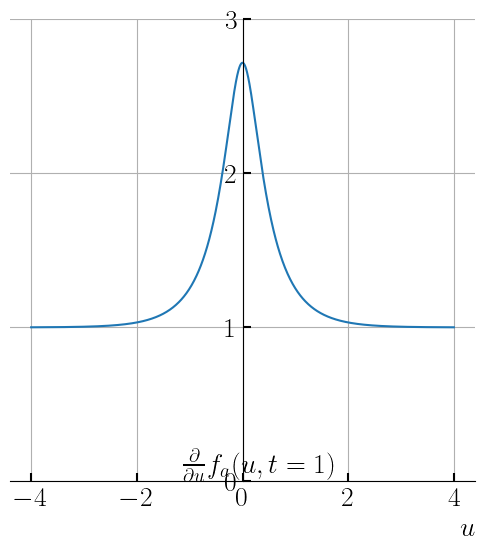

In [23]:
plt.figure(figsize=(6,6))
plt.tight_layout()
x = np.linspace(-4,4,1000)
y = np.exp(1)*np.cosh(x)/((1 + (np.exp(1)*np.sinh(x))**2)**0.5)
np.arcsinh(np.exp(1)*np.sinh(x))
plt.plot(x, y)
plt.yticks(np.arange(0,4,1), fontsize=20)
plt.xticks(np.arange(-4,5,2), fontsize=25)
plt.xlabel(r'$u$', loc = 'right', fontsize=20)
plt.ylabel(r'$\frac{\partial}{\partial u}{f_a}(u, t=1)$', loc='bottom', rotation = 0, fontsize=20, labelpad=30)

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)

plt.grid(True)
plt.savefig('alpha_der.pdf')

In [101]:
def alpha(u, t, a):
    return np.arcsinh(np.exp(a * t) * np.sinh(a * u)) / a

def grad(u, t, a):
    y = np.arcsinh(np.exp(a * t) * np.sinh(a * u)) / a
    return np.gradient(y,u)

def hessian(u, t, a):
    y = np.arcsinh(np.exp(a * t) * np.sinh(a * u)) / a
    return np.gradient(np.gradient(y,u),u)


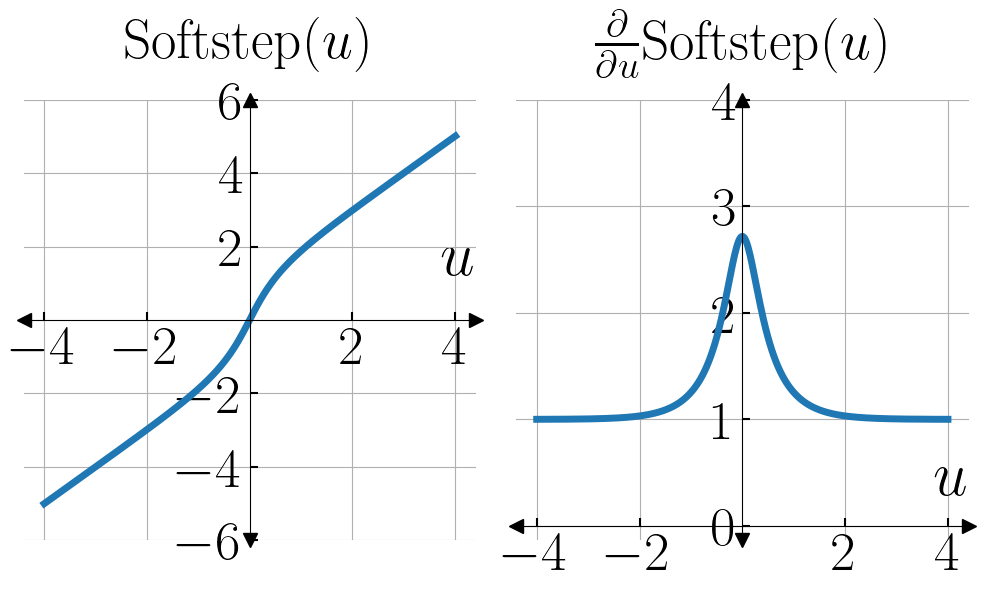

In [6]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
# plt.tight_layout()
for ax in axs:
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)
    ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot((0), (0), ls="", marker="<", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (0), ls="", marker="v", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.grid(True)
# Plot f(x, a=1, t) for different t values in subplot 1
x = np.linspace(-4,4.01,400)
axs[0].plot(x, alpha(x, 1, 1), linewidth=5)
axs[0].set_yticks([-6,-4, -2, 2, 4, 6], labelsize=45)
axs[0].set_xticks([-4,-2,2,4], labelsize=45)    
axs[0].xaxis.set_label_coords(.5, .7)

x = np.linspace(-4, 4, 400)
# # Plot df/dx for different t values in subplot 2
axs[1].plot(x, grad(x, 1, 1), linewidth=5)
axs[1].set_yticks(np.arange(0,4.1,1), fontsize=45)
axs[1].set_xticks([-4,-2,2,4], fontsize=45)
axs[1].xaxis.set_label_coords(.5, .2)
# # Plot d^2f/dx^2 for different t values in subplot 3

# Set titles and labels
axs[0].set_title(r'$\textnormal{Softstep}(u)$', fontsize=40, pad=30)
axs[1].set_title(r'$\frac{\partial}{\partial u}\textnormal{Softstep}(u)$', fontsize=40, pad=30)
for ax in axs:
    ax.set_xlabel(r'$u$', loc='right', fontsize=45)
    ax.yaxis.set_tick_params(labelsize=40)
    ax.xaxis.set_tick_params(labelsize=40)




# fig.legend(loc='upper center', bbox_to_anchor=(0.508, 1.15), ncol=len(t_values), fontsize=35, frameon=False)

# Adjust layout
plt.tight_layout()
plt.savefig('Softstep.pdf')


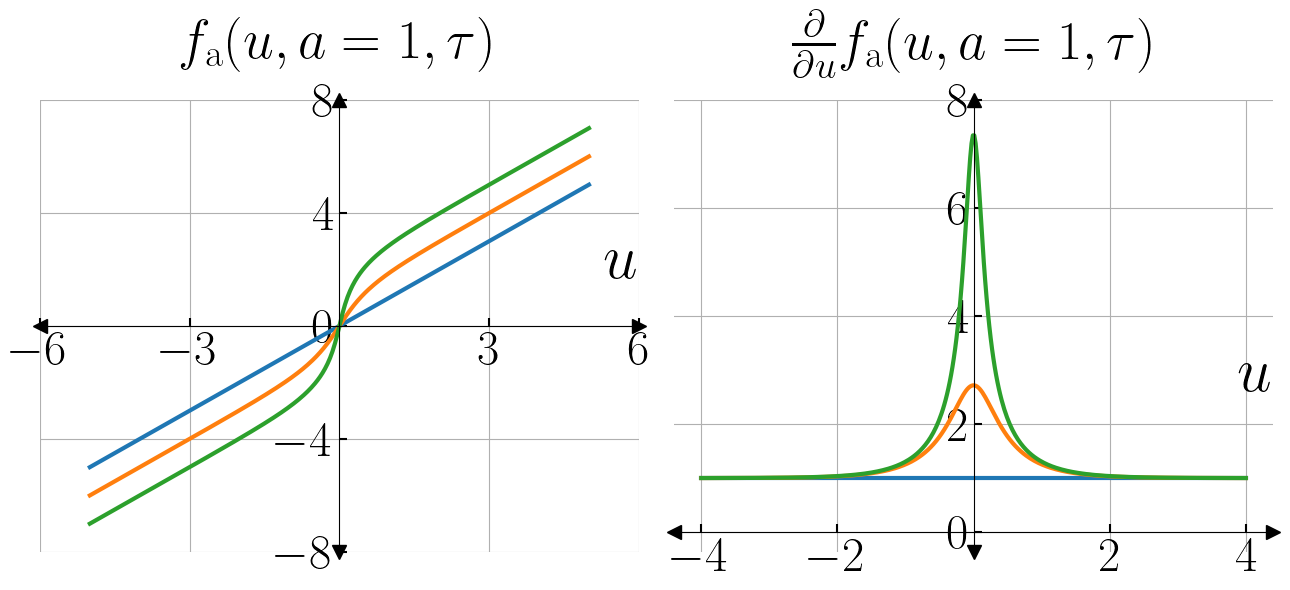

In [38]:
t_values = [0,1,2]

# Values of x
x = np.linspace(-5, 5, 400)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

for ax in axs:
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)
    ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot((0), (0), ls="", marker="<", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (0), ls="", marker="v", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.grid(True)

# Plot f(x, a=1, t) for different t values in subplot 1
for t in t_values:
    axs[0].plot(x, alpha(x, t, 1), linewidth=3,label=r'$\tau = $'+str(t))
    axs[0].set_yticks(np.arange(-8,8.1,4), labelsize=45)
    axs[0].set_xticks([-6,-3,3,6], labelsize=45)
    
    axs[0].xaxis.set_label_coords(.5, .7)

x = np.linspace(-4, 4, 400)
# # Plot df/dx for different t values in subplot 2
for t in t_values:
    axs[1].plot(x, grad(x, t, 1), linewidth=3)
    axs[1].set_yticks(np.arange(0,8.1,2), fontsize=45)
    axs[1].set_xticks([-4,-2,2,4], fontsize=45)
    axs[1].xaxis.set_label_coords(.5, .45)
# # Plot d^2f/dx^2 for different t values in subplot 3
x = np.linspace(-2, 2.1, 400)
# for t in t_values:
#     axs[2].plot(x, hessian(x, t, 1), linewidth=3)
#     axs[2].set_yticks(np.arange(-20,20.1,10), fontsize=45)
#     axs[2].set_xticks([-2, -1, 1, 2], fontsize=45)
#     axs[2].xaxis.set_label_coords(.5, .7)

# Set titles and labels
axs[0].set_title(r'$\boldmath{f_\mathrm{a}(u,a =1,\tau)}$', fontsize=40, pad=30)
axs[1].set_title(r'$\frac{\partial}{\partial u}f_\mathrm{a}(u,a =1,\tau)$', fontsize=40, pad=30)
# axs[2].set_title(r'$\frac{\partial^2}{\partial u^2}f_\mathrm{a}(u,a =1,\tau)$', fontsize=40, pad=30)
for ax in axs:
    ax.set_xlabel(r'$u$', loc='right', fontsize=45)
    ax.yaxis.set_tick_params(labelsize=35)
    ax.xaxis.set_tick_params(labelsize=35)




# fig.legend(loc='upper center', bbox_to_anchor=(0.508, 1.2), ncol=len(t_values), fontsize=35, frameon=False)

# Adjust layout
fig.tight_layout()
plt.savefig('var_t.pdf')


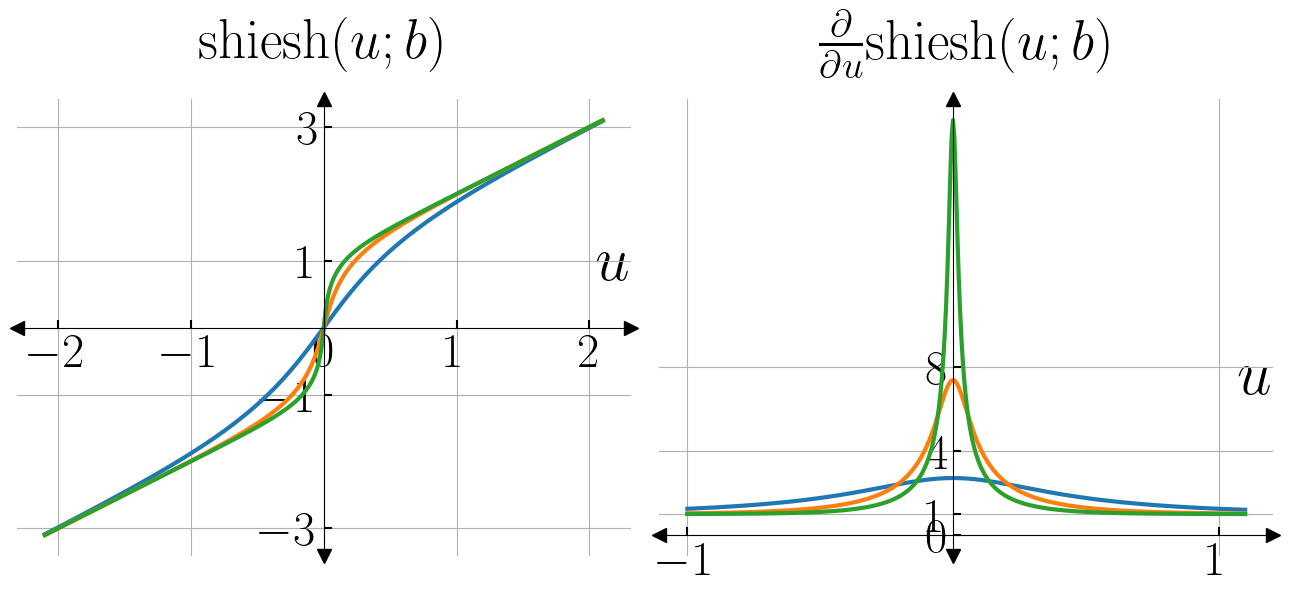

In [113]:
a_values = [1,2,3]

# Values of x


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
plt.tight_layout()
for ax in axs:
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)
    ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot((0), (0), ls="", marker="<", ms=10, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (0), ls="", marker="v", ms=10, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.grid(True)
x = np.linspace(-2.1, 2.1, 400)
# Plot f(x, a=1, t) for different t values in subplot 1
for a in a_values:
    axs[0].plot(x, alpha(x, 1, a), linewidth=3,label=r'$a = $'+str(a))
    axs[0].set_yticks([-3,-1,1,3], labelsize=45)
    axs[0].set_xticks([-2,-1,0,1,2], labelsize=45)
    axs[0].xaxis.set_label_coords(.5, .7)

x = np.linspace(-1, 1.1, 400)
# # Plot df/dx for different t values in subplot 2
for a in a_values:
    axs[1].plot(x, grad(x, 1, a), linewidth=3)
    axs[1].set_yticks([0,4,8,12,16], fontsize=45)
    axs[1].set_xticks([-1,1], fontsize=35, fontlabel='bold')
    axs[1].xaxis.set_label_coords(.5, .45)
# # Plot d^2f/dx^2 for different t values in subplot 3
# x = np.linspace(-0.5, 0.5, 400)
# for a in a_values:
#     axs[2].plot(x, hessian(x, 1, a), linewidth=3)
#     axs[2].set_yticks(np.arange(-100,100.1,100), fontsize=45)
#     axs[2].set_xticks([-0.5, 0.5], fontsize=45)
#     axs[2].xaxis.set_label_coords(.5, .7)

# Set titles and labels
axs[0].set_title(r'$\boldmath{\textnormal{shiesh}(u;b)}$', fontsize=40, pad=30)
axs[1].set_title(r'$\frac{\partial}{\partial u}\textnormal{shiesh}(u;b)$', fontsize=40, pad=30)
# axs[2].set_title(r'$\frac{\partial^2}{\partial u^2}f_\mathrm{a}(u,a,\tau=1)$', fontsize=40, pad=30)
for ax in axs:
    ax.set_xlabel(r'$u$', loc='right', fontsize=45, fontweight='bold')
    ax.yaxis.set_tick_params(labelsize=35)
    ax.xaxis.set_tick_params(labelsize=35)
# fig.legend(loc='upper center', bbox_to_anchor=(0.508, 1.3), ncol=len(a_values), fontsize=35, frameon=False)

# Adjust layout
fig.tight_layout()
plt.savefig('var_a.pdf')

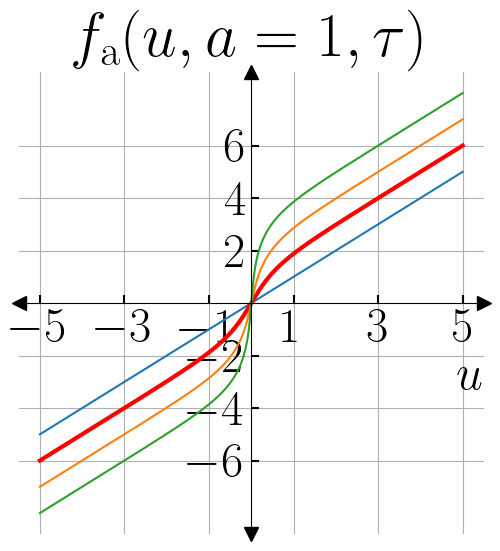

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def alpha(u, t):
    return np.arcsinh(np.exp(t) * np.sinh(u))

def derivative_alpha(u, t):
    return np.exp(t) * np.cosh(u) / np.sqrt(1 + (np.exp(t) * np.sinh(u))**2)

# Create the u values
u_values = np.linspace(-5, 5, 400)

# Create the subplots
# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for alpha(u, t)
t_values_alpha = [0, 1, 2, 3]
plt.figure(figsize=(6,6))
# plt.tight_layout()

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot((0), (0), ls="", marker="<", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (0), ls="", marker="v", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
plt.grid(True)


for t in t_values_alpha:
    alpha_values = alpha(u_values, t)
    derivative_values = derivative_alpha(u_values, t)
    if t == 1:
        plt.plot(u_values, alpha_values, linewidth=3, label=r'$\tau$ = '+str(t), color='red')
    else:   
        plt.plot(u_values, alpha_values, label=r'$\tau$ = '+str(t))
    # axs[1].plot(u_values, derivative_values)



# plt.title(r'$f_\mathrm{a}(u,t,a =1) = \frac{1}{a}\sinh^{-1}(\exp(a\cdot t)\sinh(a\cdot u))$', size=20)
plt.title(r'$f_\mathrm{a}(u,a =1,\tau)$', size=45)
plt.xlabel(r'$u$', size=35, loc = 'right')
# plt.legend(fontsize=35, handlelength=1, loc = 2, frameon=False)
plt.yticks([-6,-4,-2,2,4,6], fontsize=35)
plt.xticks([-5,-3,-1,1, 3,5], fontsize=35)

# Adjust layout
plt.savefig('alpha_varyt.pdf')

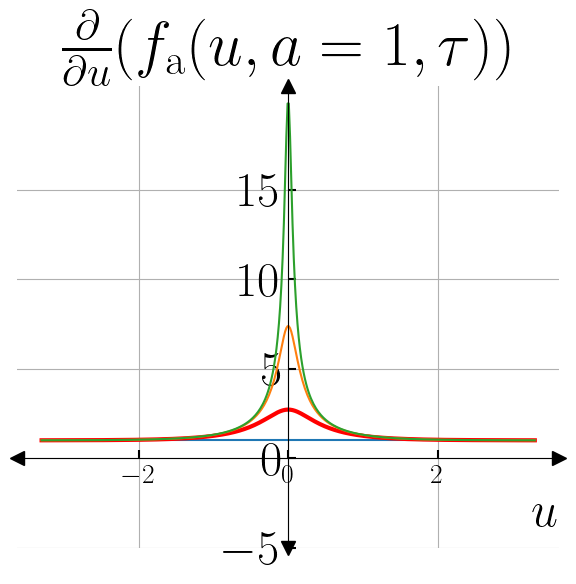

In [3]:
# Define the functions
def alpha(u, t):
    return np.arcsinh(np.exp(t) * np.sinh(u))

def derivative_alpha(u, t):
    return np.exp(t) * np.cosh(u) / np.sqrt(1 + (np.exp(t) * np.sinh(u))**2)

# Create the u values
u_values = np.linspace(-3.3, 3.3, 400)

# Plot for alpha(u, t)
t_values_alpha = [0, 1, 2, 3]
plt.figure(figsize=(7,6))
# plt.tight_layout()

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot((0), (0), ls="", marker="<", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (0), ls="", marker="v", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
plt.grid(True)


for t in t_values_alpha:
    alpha_values = alpha(u_values, t)
    derivative_values = derivative_alpha(u_values, t)
    if t==1:
        plt.plot(u_values, derivative_values, linewidth=3, label=r'$\tau$ = '+str(t), color='red')
    else:
        plt.plot(u_values, derivative_values, label=r'$\tau$ = '+str(t))


plt.grid(True)
# plt.yticks(np.arange(-1,4,20), fontsize=35)
plt.title(r'$\frac{\partial}{\partial u}(f_\mathrm{a}(u, a=1, \tau))$', size=45)
# plt.title(r'$\frac{\partial}{\partial u}(f_\mathrm{a}(u,t,a=1)) = \frac{\exp(a\cdot t) \cosh(a\cdot u)}{\sqrt{1 + (\exp(a\cdot t) \sinh(a \cdot u))^2}}$', size=20)

plt.xlabel(r'$u$', size=35, loc = 'right')
# plt.ylabel(r'$u$' size=20, loc = 'left')
plt.yticks(np.arange(-5,20,5), fontsize=35)

# plt.legend(fontsize=35)

# Adjust layout
plt.savefig('alpha_der_varyt.pdf')

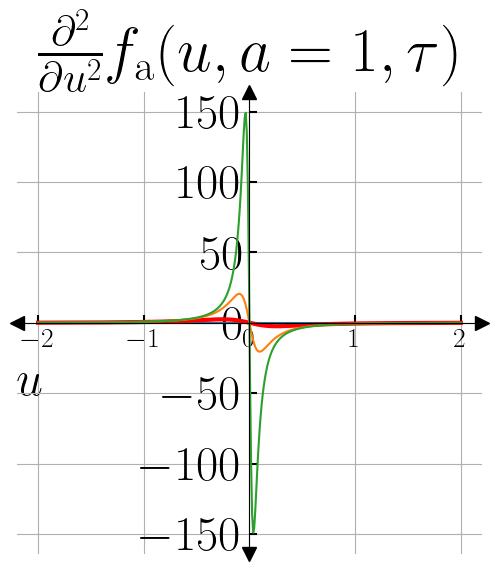

In [17]:
def hessian(x, t, a=1):
    y = np.arcsinh(np.exp(t)*np.sinh(a*x))
    return np.gradient(np.gradient(y,x),x)
# Create the u values
u_values = np.linspace(-2, 2, 400)

# Plot for alpha(u, t)
t_values_alpha = [0, 1, 2, 3]
plt.figure(figsize=(6,6))
plt.tight_layout()

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot((0), (0), ls="", marker="<", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (0), ls="", marker="v", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
plt.grid(True)
plt.rcParams["font.family"] = "cursive"


for t in t_values_alpha:
    hessian_values = hessian(u_values, t)
    if t==1:
        plt.plot(u_values, hessian_values, linewidth=3, label=r'$\tau = $'+str(t), color='red')
    else:
        plt.plot(u_values, hessian_values, label=r'$\tau = $'+str(t))


plt.grid(True)
plt.yticks(np.arange(-150,151,50), fontsize=35)
plt.title(r'$\frac{\partial^2}{\partial u^2}f_\mathrm{a}(u,a=1,\tau)$', size=45)
# plt.title(r'$\frac{\partial}{\partial u}(f_\mathrm{a}(u,t,a=1)) = \frac{\exp(a\cdot t) \cosh(a\cdot u)}{\sqrt{1 + (\exp(a\cdot t) \sinh(a \cdot u))^2}}$', size=20)

plt.xlabel(r'$u$', size=35, loc = 'left')
# plt.ylabel(r'$u$' size=20, loc = 'left')

# plt.legend(fontsize=25)

# Adjust layout
plt.savefig('alpha_hess_varyt.pdf')

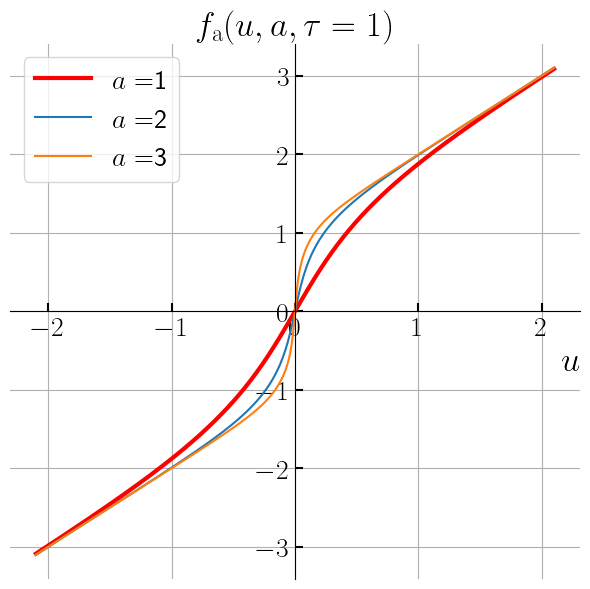

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def alpha(u, a, t=1):
    return np.arcsinh(np.exp(a*t) * np.sinh(a*u))/a

def derivative_alpha(u, a, t=1):
    return np.exp(a*t) * np.cosh(a*u) / np.sqrt(1 + (np.exp(a*t) * np.sinh(a*u))**2)

# Create the u values
u_values = np.linspace(-2.1, 2.1, 400)

# Create the subplots
# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for alpha(u, t)
a_values_alpha = [1, 2, 3]
plt.figure(figsize=(6,6))

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)
plt.grid(True)


for a in a_values_alpha:
    alpha_values = alpha(u_values, a)
    derivative_values = derivative_alpha(u_values, a)
    if a == 0:
        plt.plot(u_values, alpha_values)
    if a == 1:
        plt.plot(u_values, alpha_values, linewidth=3, label=r'$a = $'+str(a), color='red')
    else:
        plt.plot(u_values, alpha_values, label=r'$a = $'+str(a))
    # axs[1].plot(u_values, derivative_values)



# plt.title(r'$f_\mathrm{a}(u,t,a =1) = \frac{1}{a}\sinh^{-1}(\exp(a\cdot t)\sinh(a\cdot u))$', size=20)
plt.title(r'$f_\mathrm{a}(u,a,\tau=1)$', size=25)
plt.xlabel(r'$u$', size=25, loc = 'right')
plt.legend(fontsize=20)

# Adjust layout
plt.tight_layout()
plt.savefig('alpha_varya.pdf')

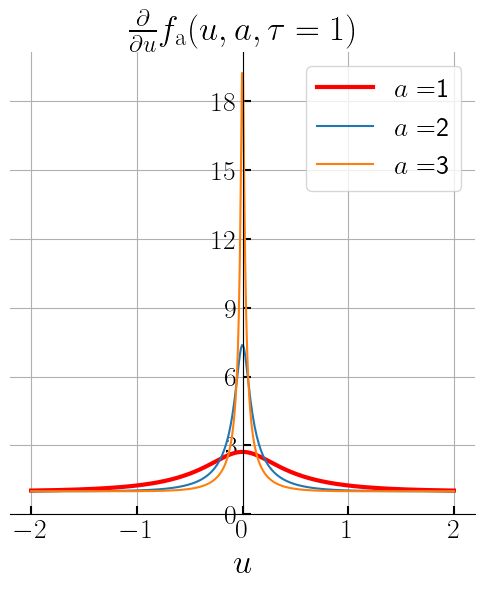

In [74]:
# Define the functions
def alpha(u, a, t=1):
    return np.arcsinh(np.exp(a*t) * np.sinh(a*u))/a

def derivative_alpha(u, a, t=1):
    return np.exp(a*t) * np.cosh(a*u) / np.sqrt(1 + (np.exp(a*t) * np.sinh(a*u))**2)
# Create the u values
u_values = np.linspace(-2, 2, 400)

# Plot for alpha(u, t)
a_values_alpha = [1, 2, 3]
plt.figure(figsize=(6,6))
plt.tight_layout()

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)


for a in a_values_alpha:
    alpha_values = alpha(u_values, a)
    derivative_values = derivative_alpha(u_values, a)
    if a==1:
        plt.plot(u_values, derivative_values, linewidth=3, label=r'$a = $'+str(a), color='red')
    else:
        plt.plot(u_values, derivative_values, label=r'$a = $'+str(a))


plt.grid(True)
plt.yticks(np.arange(0,19,3), fontsize=20)
plt.title(r'$\frac{\partial}{\partial u}f_\mathrm{a}(u,a,\tau=1)$', size=25)
# plt.title(r'$\frac{\partial}{\partial u}(f_\mathrm{a}(u,t,a=1)) = \frac{\exp(a\cdot t) \cosh(a\cdot u)}{\sqrt{1 + (\exp(a\cdot t) \sinh(a \cdot u))^2}}$', size=20)

plt.xlabel(r'$u$', size=25, loc = 'center')
# plt.ylabel(r'$u$' size=20, loc = 'left')

plt.legend(fontsize=20)

# Adjust layout
plt.savefig('alpha_der_varya.pdf')

In [9]:
import numpy as np
A = np.random.rand(4,2)
B = np.random.rand(4,2)
Att = np.matmul(A, B.transpose()) + np.eye(4)

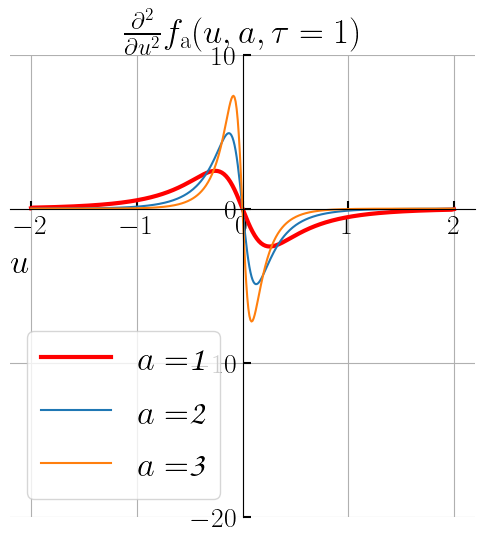

In [202]:
def hessian(x, a, t=1):
    y = np.arcsinh(np.exp(t)*np.sinh(a*x))/a
    return np.gradient(np.gradient(y,x),x)
# Create the u values
u_values = np.linspace(-2, 2, 400)

# Plot for alpha(u, t)
a_values_alpha = [1, 2, 3]
plt.figure(figsize=(6,6))
plt.tight_layout()

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(axis='both', which='both', direction='in', labelsize=20, width=1.5, length=6)


for a in a_values_alpha:
    hessian_values = hessian(u_values, a)
    if a==1:
        plt.plot(u_values, hessian_values, linewidth=3, label=r'$a = $'+str(a), color='red')
    else:
        plt.plot(u_values, hessian_values, label=r'$a = $'+str(a))


plt.grid(True)
plt.yticks(np.arange(-20,20,10), fontsize=20)
plt.title(r'$\frac{\partial^2}{\partial u^2}f_\mathrm{a}(u,a,\tau=1)$', size=25)
# plt.title(r'$\frac{\partial}{\partial u}(f_\mathrm{a}(u,t,a=1)) = \frac{\exp(a\cdot t) \cosh(a\cdot u)}{\sqrt{1 + (\exp(a\cdot t) \sinh(a \cdot u))^2}}$', size=20)

plt.xlabel(r'$u$', size=25, loc = 'left')
# plt.ylabel(r'$u$' size=20, loc = 'left')

plt.legend(fontsize=25)

# Adjust layout
plt.savefig('alpha_hess_varya.pdf')

In [1]:
from critdd import Diagram
import pandas as pd

# download example data
_URL = "/home/yalavarthi/Nextcloud/vijaya_research/flow_forecast/ProFITi/ICLR_2024/fig/perm_chans.csv"
df = pd.read_csv(_URL).pivot(
    index = "dataset_name",
    columns = "classifier_name",
    values = "accuracy"
)

# create a CD diagram from the Pandas DataFrame
diagram = Diagram(
    df.to_numpy(),
    treatment_names = df.columns,
    maximize_outcome = True
)

# inspect average ranks and groups of statistically indistinguishable treatments
diagram.average_ranks # the average rank of each treatment
diagram.get_groups(alpha=.05, adjustment="holm")

# export the diagram to a file
diagram.to_file(
    "example.tex",
    alpha = .05,
    adjustment = "holm",
    reverse_x = True,
    axis_options = {"title": "Critical Difference Diagram"},
)


In [34]:
perm = np.random.permutation(4)
Att2 = Att[perm][:,perm]
print(Att2)

[[1.67621538 0.68733122 0.6343154  1.13771216]
 [0.60504058 1.60959927 0.56091455 1.01470276]
 [0.06754665 0.08695682 1.08590408 0.12471898]
 [0.21677977 0.29674903 0.29746867 1.41096089]]


In [35]:
L2 = np.tril(Att2)
print(L2)
print(np.matmul(L2, L2.transpose()))

[[1.67621538 0.         0.         0.        ]
 [0.60504058 1.60959927 0.         0.        ]
 [0.06754665 0.08695682 1.08590408 0.        ]
 [0.21677977 0.29674903 0.29746867 1.41096089]]
[[2.809698   1.01417833 0.11322273 0.36336959]
 [1.01417833 2.95688391 0.18083409 0.60880758]
 [0.11322273 0.18083409 1.19131171 0.36346954]
 [0.36336959 0.60880758 0.36346954 2.21435169]]


In [26]:
print(L1, L2)

[[1.08590408 0.         0.         0.        ]
 [0.29746867 1.41096089 0.         0.        ]
 [0.56091455 1.01470276 1.60959927 0.        ]
 [0.6343154  1.13771216 0.68733122 1.67621538]] [[1.08590408 0.         0.         0.        ]
 [0.6343154  1.13771216 0.         0.        ]
 [0.29746867 1.41096089 0.29674903 0.        ]
 [0.56091455 1.01470276 1.60959927 0.60504058]]


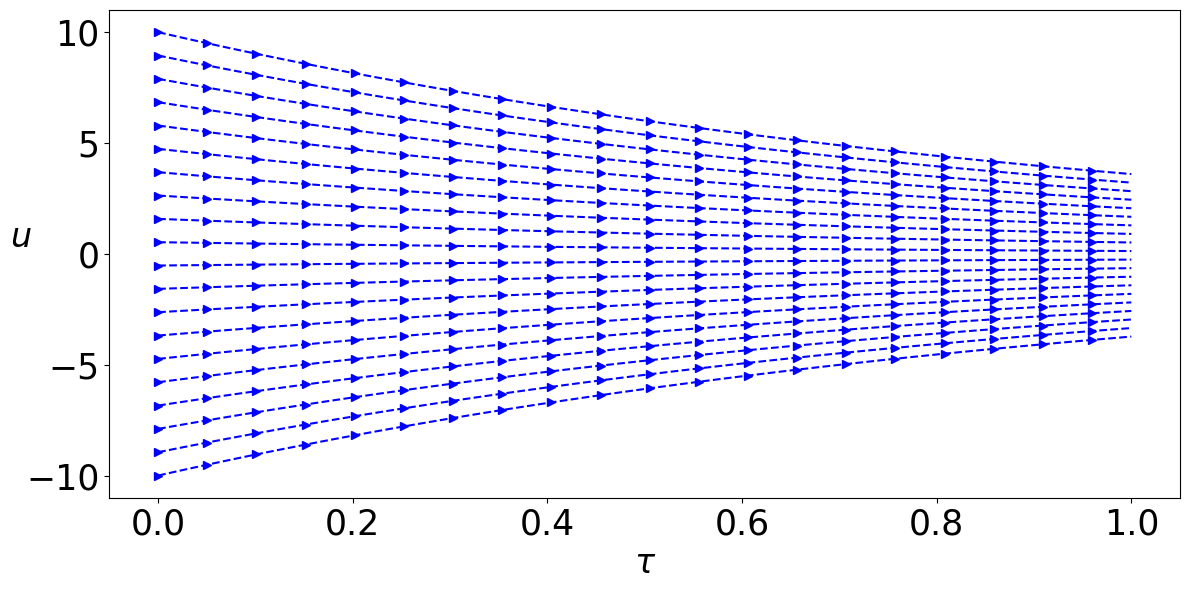

In [63]:
import torch
import torch.nn as nn
from torchdiffeq import odeint
import matplotlib.pyplot as plt
import numpy as np
class ODEFunc(nn.Module):
    def __init__(self, dim):
        super(ODEFunc, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(dim, 64),
            nn.Sigmoid(),
            nn.Linear(64, 64),
            nn.Sigmoid(),
            nn.Linear(64, 64),
            nn.Sigmoid(),
            nn.Linear(64, dim),
            # nn.Sigmoid()
        )

    def forward(self, t, y):
        return self.network(y) - y

class MonotonicODE(nn.Module):
    def __init__(self, dim):
        super(MonotonicODE, self).__init__()
        self.odefunc = ODEFunc(dim)

    def forward(self, x):
        t = torch.linspace(0.0, 1, 100).to(x.device)  # Time span, adjust as needed
        solution = odeint(self.odefunc, x, t, method='euler')  # Use your desired integration method
        return solution  # Return the final value

# Example usage:
input_dim = 1
model = MonotonicODE(input_dim)
input_data = torch.linspace(-10,10,20).unsqueeze(1)
# input_data = torch.tensor([[0.0], [-10.0], [10.0]])  # Example input data
output = model(input_data)
plt.figure(figsize=(12,6))
ax=plt.gca()
# ax.spines['bottom'].set_position('zero')
plt.xticks(np.linspace(0,1,6), fontsize=25)
plt.yticks(np.linspace(-10,10,5), fontsize=25)
plt.xlabel(r'$\tau$', fontsize=24)
plt.ylabel(r'$u$', fontsize=24, rotation=0)
for i in range(len(input_data)):
    plt.plot(np.linspace(0,1,len(output[:,1])),output[:,i].detach().cpu().numpy(), c='blue', marker='>', markevery=5, linestyle='--')
plt.tight_layout()
plt.savefig('ode_lines.pdf')
# plt.plot(np.linspace(0,1,len(output[:,1])), np.zeros_like(output[:,i].detach().cpu().numpy()), c='black')

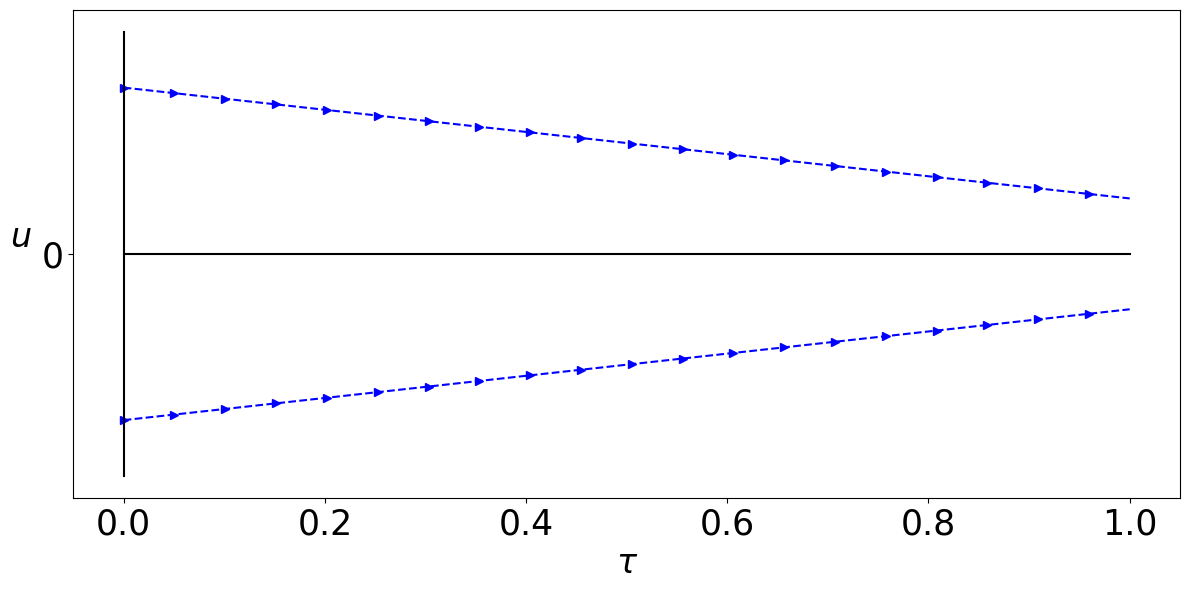

In [98]:
import torch
import torch.nn as nn
from torchdiffeq import odeint
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0,1,100)
input = [-10, 10]
plt.figure(figsize=(12,6))
ax=plt.gca()
# ax.spines['bottom'].set_position('zero')
plt.xticks(np.linspace(0,1,6), fontsize=25)
plt.yticks([0], fontsize=25)
plt.xlabel(r'$\tau$', fontsize=24)
plt.ylabel(r'$u$', fontsize=24, rotation=0, labelpad=15)
plt.plot(t, 10*t - 15, c = 'blue', marker='>', markevery=5, linestyle='--')
plt.plot(t, -10*t + 15, c=  'blue', marker='>', markevery=5, linestyle='--')
plt.plot(t, t*0, c = 'black')
plt.plot([0,0], [20,-20], c = 'black')
# for i in range(len(input_data)):
#     plt.plot(np.linspace(0,1,len(output[:,1])),output[:,i].detach().cpu().numpy(), c='blue', marker='>', markevery=5, linestyle='--')
plt.tight_layout()
plt.savefig('ode_lines.pdf')
# plt.plot(np.linspace(0,1,len(output[:,1])), np.zeros_like(output[:,i].detach().cpu().numpy()), c='black')

In [12]:
import Tensor
import torch
from torch import nn

class shiesh(nn.Module):
    threshold: Tensor
    slope: Tensor

    def __init__(self) -> None:
        super().__init__()
        self.register_buffer("threshold", 5)
        self.register_buffer("slope", torch.exp(1.))
    
    def shiesh_(self, x: Tensor) -> Tensor:
        return torch.arcsinh(torch.exp(1)*torch.sinh(x))
    
    def Dshiesh(self, x: Tensor) -> Tensor:
        return torch.exp(1)*torch.cosh(x)/(1 + (torch.exp(1)*torch.sinh(x))**2)**0.5

    def forward(self, x: Tensor) -> (Tensor, Tensor):
        mask = x.abs() <= self.threshold
        x_out =  torch.where(mask, self.shiesh_(x), x + torch.sign(x))
        ldj = torch.log(torch.where(mask, self.Dshiesh(x), x + torch.sign(x)))
        return x_out, ldj

NameError: name 'Tensor' is not defined

In [9]:
class shiesh_inv(nn.Module):
    threshold: Tensor
    slope: Tensor

    def __init__(self) -> None:
        super().__init__()
        self.register_buffer("threshold", 5)
        self.register_buffer("slope", torch.exp(1.))
    
    def shiesh_inv_(self, x: Tensor) -> Tensor:
        return torch.arcsinh(torch.exp(-1)*torch.sinh(x))
    
    def Dshiesh_inv(self, x: Tensor) -> Tensor:
        return torch.exp(-1)*torch.cosh(x)/(1 + (torch.exp(-1)*torch.sinh(x))**2)**0.5

    def forward(self, x: Tensor) -> (Tensor, Tensor):
        mask = x.abs() <= self.threshold
        x_out =  torch.where(mask, self.shiesh_inv_(x), x - torch.sign(x))
        ldj = torch.log(torch.where(mask, self.Dshiesh_inv(x), x + torch.sign(x)))
        return x_out, ldj

NameError: name 'nn' is not defined

In [119]:
x

array([nan, nan, nan, ..., nan, nan, nan])

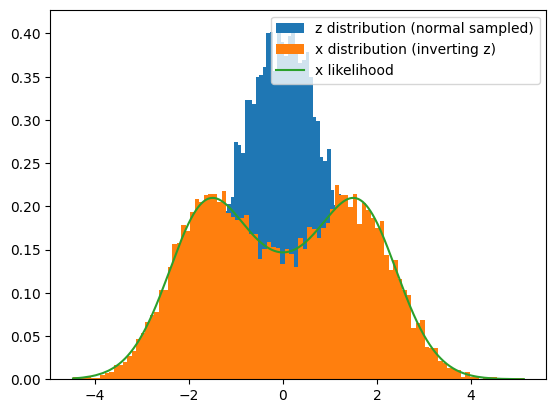

In [159]:
import numpy as np
from scipy.special import erf, erfc, erfcinv
R2 = np.sqrt(2)

def shiesh(z):
    return np.arcsinh(np.exp(1) * np.sinh(z))

def llh(z,mean=0, variance=1):
    exponent = -((z - mean)**2) / (2 * variance)
    likelihood = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(exponent)
    return likelihood

def transport(z, mu=1):
    return -R2*erfcinv((erfc((-z+mu)/R2) + erfc(-(z+mu)/R2))/2)
    

z = np.sort(np.random.randn(10000))
llh_z = llh(z)
x = shiesh(z)
# x = transport(z, mu=2)
jac = np.gradient(z, x)

llh_x = llh_z*jac
plt.hist(z, bins=100, density=True, label = 'z distribution (normal sampled)')
plt.hist(x, bins=100, density=True, label = 'x distribution (inverting z)')
plt.plot(x, llh_x, label = 'x likelihood')

plt.legend()

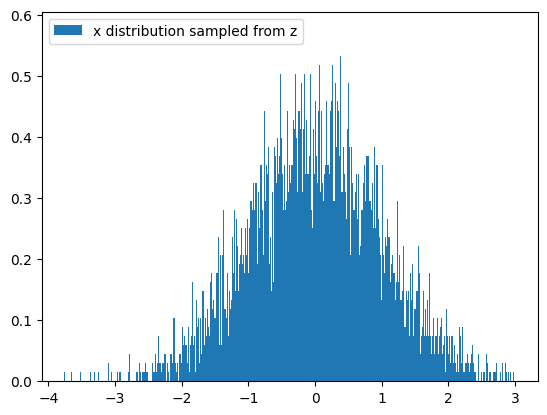

In [163]:
import numpy as np
def shiesh(z):
    asd = np.where(z<3, z, 0.001*z+2.997)
    return asd
def llh(z,mean=0, variance=1):
    exponent = -((z - mean)**2) / (2 * variance)
    likelihood = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(exponent)
    return likelihood

z = np.sort(np.random.randn(10000))
llh_z = llh(z)
x = shiesh(z)
jac = np.gradient(z, x)
llh_x = llh_z*jac
# plt.hist(z, bins=100, density=True, label = 'z distribution (normal sampled)')
plt.hist(x, bins=1000, density=True, label = 'x distribution sampled from z')
# plt.plot(x, llh_x, label = 'x likelihood')
plt.legend()